In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 60.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# Spanish corpus of 44 texts from ECHR (automatic translations) with projected (reviewed) annotations

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-rev-train.tsv', column_delimiter=' ',
                                    dev_file='ES-rev-dev.tsv',
                                    test_file='ES-rev-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-23 16:11:33,275 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-23 16:11:33,276 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-rev-train.tsv
2024-01-23 16:11:33,277 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-rev-dev.tsv
2024-01-23 16:11:33,279 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-rev-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1245,
        "number_of_documents_per_class": {
            "CODE": 39,
            "PER": 268,
            "DATETIME": 602,
            "LOC": 82,
            "ORG": 184,
            "DEM": 67,
            "MISC": 40,
            "QUANTITY": 42
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 34924,
            "min": 1,
            "max": 556,
            "avg": 28.05140562248996
        }
    },
    "TEST": {
        "dataset": "TEST

In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2024-01-23 16:11:49,201 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-23 16:11:49,840 Computing label dictionary. Progress:


1245it [00:00, 53165.97it/s]

2024-01-23 16:11:49,869 Dictionary created for label 'ner' with 9 values: DATETIME (seen 602 times), PER (seen 268 times), ORG (seen 184 times), LOC (seen 82 times), DEM (seen 67 times), QUANTITY (seen 42 times), MISC (seen 40 times), CODE (seen 39 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'DEM', b'QUANTITY', b'MISC', b'CODE']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-23 16:11:49,886 SequenceTagger predicts: Dictionary with 33 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-MISC, B-MISC, E-MISC, I-MISC, S-CODE, B-CODE, E-CODE, I-CODE


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=18,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-23 16:11:50,497 ----------------------------------------------------------------------------------------------------
2024-01-23 16:11:50,499 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

2024-01-23 16:12:20,685 Evaluating as a multi-label problem: False
2024-01-23 16:12:20,705 DEV : loss 0.5198442339897156 - f1-score (micro avg)  0.44
2024-01-23 16:12:20,725 BAD EPOCHS (no improvement): 0
2024-01-23 16:12:20,730 saving best model


2024-01-23 16:12:26,037 ----------------------------------------------------------------------------------------------------
2024-01-23 16:12:26,578 epoch 2 - iter 3/39 - loss 0.64900784 - time (sec): 0.54 - samples/sec: 4881.11 - lr: 0.100000
2024-01-23 16:12:29,844 epoch 2 - iter 6/39 - loss 0.56743998 - time (sec): 3.80 - samples/sec: 1445.93 - lr: 0.100000
2024-01-23 16:12:31,405 epoch 2 - iter 9/39 - loss 0.57112800 - time (sec): 5.37 - samples/sec: 1500.47 - lr: 0.100000
2024-01-23 16:12:32,916 epoch 2 - iter 12/39 - loss 0.57868628 - time (sec): 6.88 - samples/sec: 1537.80 - lr: 0.100000
2024-01-23 16:12:34,459 epoch 2 - iter 15/39 - loss 0.57944417 - time (sec): 8.42 - samples/sec: 1580.42 - lr: 0.100000
2024-01-23 16:12:36,003 epoch 2 - iter 18/39 - loss 0.55089019 - time (sec): 9.96 - samples/sec: 1626.20 - lr: 0.100000
2024-01-23 16:12:37,674 epoch 2 - iter 21/39 - loss 0.53027275 - time (sec): 11.64 - samples/sec: 1576.10 - lr: 0.100000
2024-01-23 16:12:39,229 epoch 2 - ite

100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

2024-01-23 16:12:50,504 Evaluating as a multi-label problem: False
2024-01-23 16:12:50,520 DEV : loss 0.3411714732646942 - f1-score (micro avg)  0.625
2024-01-23 16:12:50,550 BAD EPOCHS (no improvement): 0
2024-01-23 16:12:50,555 saving best model


2024-01-23 16:12:56,024 ----------------------------------------------------------------------------------------------------
2024-01-23 16:12:56,978 epoch 3 - iter 3/39 - loss 0.36550587 - time (sec): 0.95 - samples/sec: 2476.00 - lr: 0.100000
2024-01-23 16:13:00,016 epoch 3 - iter 6/39 - loss 0.40142234 - time (sec): 3.99 - samples/sec: 1173.90 - lr: 0.100000
2024-01-23 16:13:01,482 epoch 3 - iter 9/39 - loss 0.36689338 - time (sec): 5.46 - samples/sec: 1302.60 - lr: 0.100000
2024-01-23 16:13:02,964 epoch 3 - iter 12/39 - loss 0.36940512 - time (sec): 6.94 - samples/sec: 1388.17 - lr: 0.100000
2024-01-23 16:13:04,548 epoch 3 - iter 15/39 - loss 0.35192557 - time (sec): 8.52 - samples/sec: 1457.50 - lr: 0.100000
2024-01-23 16:13:06,727 epoch 3 - iter 18/39 - loss 0.51966505 - time (sec): 10.70 - samples/sec: 1448.75 - lr: 0.100000
2024-01-23 16:13:08,332 epoch 3 - iter 21/39 - loss 0.47934586 - time (sec): 12.31 - samples/sec: 1491.20 - lr: 0.100000
2024-01-23 16:13:09,836 epoch 3 - it

100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

2024-01-23 16:13:20,433 Evaluating as a multi-label problem: False
2024-01-23 16:13:20,451 DEV : loss 0.3123585879802704 - f1-score (micro avg)  0.578
2024-01-23 16:13:20,475 BAD EPOCHS (no improvement): 1
2024-01-23 16:13:20,479 ----------------------------------------------------------------------------------------------------


2024-01-23 16:13:21,282 epoch 4 - iter 3/39 - loss 0.39201853 - time (sec): 0.80 - samples/sec: 3232.97 - lr: 0.100000
2024-01-23 16:13:22,891 epoch 4 - iter 6/39 - loss 0.34697357 - time (sec): 2.41 - samples/sec: 2256.77 - lr: 0.100000
2024-01-23 16:13:24,507 epoch 4 - iter 9/39 - loss 0.32955560 - time (sec): 4.03 - samples/sec: 2039.79 - lr: 0.100000
2024-01-23 16:13:26,004 epoch 4 - iter 12/39 - loss 0.32031328 - time (sec): 5.52 - samples/sec: 1924.26 - lr: 0.100000
2024-01-23 16:13:27,573 epoch 4 - iter 15/39 - loss 0.30973912 - time (sec): 7.09 - samples/sec: 1879.91 - lr: 0.100000
2024-01-23 16:13:29,215 epoch 4 - iter 18/39 - loss 0.31319420 - time (sec): 8.73 - samples/sec: 1810.80 - lr: 0.100000
2024-01-23 16:13:30,758 epoch 4 - iter 21/39 - loss 0.30107318 - time (sec): 10.28 - samples/sec: 1768.89 - lr: 0.100000
2024-01-23 16:13:32,261 epoch 4 - iter 24/39 - loss 0.28605933 - time (sec): 11.78 - samples/sec: 1793.77 - lr: 0.100000
2024-01-23 16:13:33,603 epoch 4 - iter 27

100%|██████████| 6/6 [00:01<00:00,  4.24it/s]

2024-01-23 16:13:42,359 Evaluating as a multi-label problem: False
2024-01-23 16:13:42,373 DEV : loss 0.24341106414794922 - f1-score (micro avg)  0.6265
2024-01-23 16:13:42,394 BAD EPOCHS (no improvement): 0
2024-01-23 16:13:42,398 saving best model


2024-01-23 16:13:47,588 ----------------------------------------------------------------------------------------------------
2024-01-23 16:13:48,257 epoch 5 - iter 3/39 - loss 0.27595875 - time (sec): 0.67 - samples/sec: 4055.46 - lr: 0.100000
2024-01-23 16:13:51,886 epoch 5 - iter 6/39 - loss 0.26078742 - time (sec): 4.30 - samples/sec: 1286.61 - lr: 0.100000
2024-01-23 16:13:53,391 epoch 5 - iter 9/39 - loss 0.22965424 - time (sec): 5.80 - samples/sec: 1391.59 - lr: 0.100000
2024-01-23 16:13:54,960 epoch 5 - iter 12/39 - loss 0.22628490 - time (sec): 7.37 - samples/sec: 1445.69 - lr: 0.100000
2024-01-23 16:13:56,472 epoch 5 - iter 15/39 - loss 0.20871862 - time (sec): 8.88 - samples/sec: 1481.34 - lr: 0.100000
2024-01-23 16:13:58,842 epoch 5 - iter 18/39 - loss 0.32753486 - time (sec): 11.25 - samples/sec: 1446.84 - lr: 0.100000
2024-01-23 16:14:00,468 epoch 5 - iter 21/39 - loss 0.31211243 - time (sec): 12.88 - samples/sec: 1500.02 - lr: 0.100000
2024-01-23 16:14:02,034 epoch 5 - it

100%|██████████| 6/6 [00:01<00:00,  4.33it/s]

2024-01-23 16:14:12,266 Evaluating as a multi-label problem: False
2024-01-23 16:14:12,279 DEV : loss 0.2188306301832199 - f1-score (micro avg)  0.6667
2024-01-23 16:14:12,300 BAD EPOCHS (no improvement): 0
2024-01-23 16:14:12,305 saving best model


2024-01-23 16:14:17,821 ----------------------------------------------------------------------------------------------------
2024-01-23 16:14:18,450 epoch 6 - iter 3/39 - loss 0.16868569 - time (sec): 0.63 - samples/sec: 4403.03 - lr: 0.100000
2024-01-23 16:14:21,568 epoch 6 - iter 6/39 - loss 0.18907188 - time (sec): 3.75 - samples/sec: 1411.64 - lr: 0.100000
2024-01-23 16:14:23,667 epoch 6 - iter 9/39 - loss 0.40498851 - time (sec): 5.84 - samples/sec: 1384.76 - lr: 0.100000
2024-01-23 16:14:25,142 epoch 6 - iter 12/39 - loss 0.36660000 - time (sec): 7.32 - samples/sec: 1455.76 - lr: 0.100000
2024-01-23 16:14:26,713 epoch 6 - iter 15/39 - loss 0.33268799 - time (sec): 8.89 - samples/sec: 1531.67 - lr: 0.100000
2024-01-23 16:14:28,197 epoch 6 - iter 18/39 - loss 0.30767166 - time (sec): 10.37 - samples/sec: 1549.16 - lr: 0.100000
2024-01-23 16:14:30,099 epoch 6 - iter 21/39 - loss 0.28921079 - time (sec): 12.28 - samples/sec: 1506.13 - lr: 0.100000
2024-01-23 16:14:31,728 epoch 6 - it

100%|██████████| 6/6 [00:01<00:00,  4.42it/s]

2024-01-23 16:14:41,765 Evaluating as a multi-label problem: False
2024-01-23 16:14:41,776 DEV : loss 0.23059500753879547 - f1-score (micro avg)  0.6892
2024-01-23 16:14:41,796 BAD EPOCHS (no improvement): 0
2024-01-23 16:14:41,800 saving best model


2024-01-23 16:14:47,349 ----------------------------------------------------------------------------------------------------
2024-01-23 16:14:47,934 epoch 7 - iter 3/39 - loss 0.16753051 - time (sec): 0.58 - samples/sec: 4689.95 - lr: 0.100000
2024-01-23 16:14:51,505 epoch 7 - iter 6/39 - loss 0.19276370 - time (sec): 4.15 - samples/sec: 1247.90 - lr: 0.100000
2024-01-23 16:14:52,917 epoch 7 - iter 9/39 - loss 0.18762681 - time (sec): 5.57 - samples/sec: 1461.95 - lr: 0.100000
2024-01-23 16:14:54,271 epoch 7 - iter 12/39 - loss 0.20834001 - time (sec): 6.92 - samples/sec: 1543.92 - lr: 0.100000
2024-01-23 16:14:55,716 epoch 7 - iter 15/39 - loss 0.20195129 - time (sec): 8.36 - samples/sec: 1601.84 - lr: 0.100000
2024-01-23 16:14:57,415 epoch 7 - iter 18/39 - loss 0.20484235 - time (sec): 10.06 - samples/sec: 1615.47 - lr: 0.100000
2024-01-23 16:14:59,016 epoch 7 - iter 21/39 - loss 0.19435313 - time (sec): 11.66 - samples/sec: 1626.95 - lr: 0.100000
2024-01-23 16:15:00,561 epoch 7 - it

100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

2024-01-23 16:15:11,476 Evaluating as a multi-label problem: False
2024-01-23 16:15:11,494 DEV : loss 0.18880072236061096 - f1-score (micro avg)  0.6667
2024-01-23 16:15:11,518 BAD EPOCHS (no improvement): 1
2024-01-23 16:15:11,523 ----------------------------------------------------------------------------------------------------


2024-01-23 16:15:12,153 epoch 8 - iter 3/39 - loss 0.15170381 - time (sec): 0.63 - samples/sec: 4179.17 - lr: 0.100000
2024-01-23 16:15:13,644 epoch 8 - iter 6/39 - loss 0.15182593 - time (sec): 2.12 - samples/sec: 2404.11 - lr: 0.100000
2024-01-23 16:15:15,178 epoch 8 - iter 9/39 - loss 0.15074235 - time (sec): 3.65 - samples/sec: 2127.47 - lr: 0.100000
2024-01-23 16:15:16,704 epoch 8 - iter 12/39 - loss 0.14984087 - time (sec): 5.18 - samples/sec: 1984.91 - lr: 0.100000
2024-01-23 16:15:18,305 epoch 8 - iter 15/39 - loss 0.14929696 - time (sec): 6.78 - samples/sec: 1913.37 - lr: 0.100000
2024-01-23 16:15:19,852 epoch 8 - iter 18/39 - loss 0.15275338 - time (sec): 8.33 - samples/sec: 1876.75 - lr: 0.100000
2024-01-23 16:15:21,375 epoch 8 - iter 21/39 - loss 0.15251915 - time (sec): 9.85 - samples/sec: 1847.09 - lr: 0.100000
2024-01-23 16:15:22,968 epoch 8 - iter 24/39 - loss 0.15928032 - time (sec): 11.44 - samples/sec: 1851.81 - lr: 0.100000
2024-01-23 16:15:25,106 epoch 8 - iter 27/

100%|██████████| 6/6 [00:01<00:00,  4.48it/s]

2024-01-23 16:15:33,184 Evaluating as a multi-label problem: False
2024-01-23 16:15:33,196 DEV : loss 0.15975262224674225 - f1-score (micro avg)  0.7468
2024-01-23 16:15:33,217 BAD EPOCHS (no improvement): 0
2024-01-23 16:15:33,221 saving best model


2024-01-23 16:15:38,538 ----------------------------------------------------------------------------------------------------
2024-01-23 16:15:39,141 epoch 9 - iter 3/39 - loss 0.13569249 - time (sec): 0.56 - samples/sec: 4641.09 - lr: 0.100000
2024-01-23 16:15:42,915 epoch 9 - iter 6/39 - loss 0.14310255 - time (sec): 4.33 - samples/sec: 1275.71 - lr: 0.100000
2024-01-23 16:15:44,342 epoch 9 - iter 9/39 - loss 0.14512963 - time (sec): 5.76 - samples/sec: 1384.93 - lr: 0.100000
2024-01-23 16:15:45,754 epoch 9 - iter 12/39 - loss 0.15377289 - time (sec): 7.17 - samples/sec: 1485.72 - lr: 0.100000
2024-01-23 16:15:47,353 epoch 9 - iter 15/39 - loss 0.15180545 - time (sec): 8.77 - samples/sec: 1536.21 - lr: 0.100000
2024-01-23 16:15:48,884 epoch 9 - iter 18/39 - loss 0.14529315 - time (sec): 10.30 - samples/sec: 1556.63 - lr: 0.100000
2024-01-23 16:15:50,496 epoch 9 - iter 21/39 - loss 0.14719673 - time (sec): 11.91 - samples/sec: 1568.70 - lr: 0.100000
2024-01-23 16:15:51,935 epoch 9 - it

100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

2024-01-23 16:16:03,366 Evaluating as a multi-label problem: False
2024-01-23 16:16:03,381 DEV : loss 0.1796737164258957 - f1-score (micro avg)  0.7251
2024-01-23 16:16:03,401 BAD EPOCHS (no improvement): 1
2024-01-23 16:16:03,405 ----------------------------------------------------------------------------------------------------


2024-01-23 16:16:03,985 epoch 10 - iter 3/39 - loss 0.18908484 - time (sec): 0.58 - samples/sec: 4463.22 - lr: 0.100000
2024-01-23 16:16:05,566 epoch 10 - iter 6/39 - loss 0.19602219 - time (sec): 2.16 - samples/sec: 2426.28 - lr: 0.100000
2024-01-23 16:16:07,118 epoch 10 - iter 9/39 - loss 0.18582094 - time (sec): 3.71 - samples/sec: 2125.32 - lr: 0.100000
2024-01-23 16:16:08,773 epoch 10 - iter 12/39 - loss 0.17319468 - time (sec): 5.37 - samples/sec: 2012.53 - lr: 0.100000
2024-01-23 16:16:10,402 epoch 10 - iter 15/39 - loss 0.17317509 - time (sec): 7.00 - samples/sec: 1937.24 - lr: 0.100000
2024-01-23 16:16:11,876 epoch 10 - iter 18/39 - loss 0.16953336 - time (sec): 8.47 - samples/sec: 1884.36 - lr: 0.100000
2024-01-23 16:16:13,968 epoch 10 - iter 21/39 - loss 0.21213427 - time (sec): 10.56 - samples/sec: 1821.47 - lr: 0.100000
2024-01-23 16:16:15,510 epoch 10 - iter 24/39 - loss 0.20238646 - time (sec): 12.10 - samples/sec: 1823.06 - lr: 0.100000
2024-01-23 16:16:16,930 epoch 10 

100%|██████████| 6/6 [00:01<00:00,  4.04it/s]

2024-01-23 16:16:25,132 Evaluating as a multi-label problem: False
2024-01-23 16:16:25,145 DEV : loss 0.15091213583946228 - f1-score (micro avg)  0.7578
2024-01-23 16:16:25,166 BAD EPOCHS (no improvement): 0
2024-01-23 16:16:25,170 saving best model


2024-01-23 16:16:30,559 ----------------------------------------------------------------------------------------------------
2024-01-23 16:16:31,189 epoch 11 - iter 3/39 - loss 0.18833887 - time (sec): 0.58 - samples/sec: 4721.73 - lr: 0.100000
2024-01-23 16:16:34,717 epoch 11 - iter 6/39 - loss 0.14405982 - time (sec): 4.11 - samples/sec: 1268.07 - lr: 0.100000
2024-01-23 16:16:36,183 epoch 11 - iter 9/39 - loss 0.14011511 - time (sec): 5.58 - samples/sec: 1429.93 - lr: 0.100000
2024-01-23 16:16:37,616 epoch 11 - iter 12/39 - loss 0.14095309 - time (sec): 7.01 - samples/sec: 1536.79 - lr: 0.100000
2024-01-23 16:16:39,228 epoch 11 - iter 15/39 - loss 0.14317143 - time (sec): 8.62 - samples/sec: 1575.93 - lr: 0.100000
2024-01-23 16:16:40,766 epoch 11 - iter 18/39 - loss 0.14006655 - time (sec): 10.16 - samples/sec: 1606.47 - lr: 0.100000
2024-01-23 16:16:43,060 epoch 11 - iter 21/39 - loss 0.18482002 - time (sec): 12.46 - samples/sec: 1584.42 - lr: 0.100000
2024-01-23 16:16:44,512 epoch

100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

2024-01-23 16:16:54,679 Evaluating as a multi-label problem: False
2024-01-23 16:16:54,693 DEV : loss 0.1577819138765335 - f1-score (micro avg)  0.7788
2024-01-23 16:16:54,712 BAD EPOCHS (no improvement): 0
2024-01-23 16:16:54,716 saving best model


2024-01-23 16:17:00,961 ----------------------------------------------------------------------------------------------------
2024-01-23 16:17:01,455 epoch 12 - iter 3/39 - loss 0.07824291 - time (sec): 0.49 - samples/sec: 4711.97 - lr: 0.100000
2024-01-23 16:17:04,361 epoch 12 - iter 6/39 - loss 0.20104178 - time (sec): 3.40 - samples/sec: 1602.60 - lr: 0.100000
2024-01-23 16:17:05,840 epoch 12 - iter 9/39 - loss 0.17611146 - time (sec): 4.88 - samples/sec: 1638.44 - lr: 0.100000
2024-01-23 16:17:07,480 epoch 12 - iter 12/39 - loss 0.15762892 - time (sec): 6.52 - samples/sec: 1691.54 - lr: 0.100000
2024-01-23 16:17:09,786 epoch 12 - iter 15/39 - loss 0.15434611 - time (sec): 8.82 - samples/sec: 1538.70 - lr: 0.100000
2024-01-23 16:17:11,383 epoch 12 - iter 18/39 - loss 0.15022663 - time (sec): 10.42 - samples/sec: 1529.14 - lr: 0.100000
2024-01-23 16:17:13,013 epoch 12 - iter 21/39 - loss 0.15268606 - time (sec): 12.05 - samples/sec: 1573.09 - lr: 0.100000
2024-01-23 16:17:14,678 epoch

100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

2024-01-23 16:17:25,244 Evaluating as a multi-label problem: False
2024-01-23 16:17:25,262 DEV : loss 0.149954691529274 - f1-score (micro avg)  0.7788
2024-01-23 16:17:25,287 BAD EPOCHS (no improvement): 0
2024-01-23 16:17:25,292 ----------------------------------------------------------------------------------------------------


2024-01-23 16:17:26,272 epoch 13 - iter 3/39 - loss 0.10689902 - time (sec): 0.98 - samples/sec: 2480.04 - lr: 0.100000
2024-01-23 16:17:28,522 epoch 13 - iter 6/39 - loss 0.20236959 - time (sec): 3.23 - samples/sec: 1782.66 - lr: 0.100000
2024-01-23 16:17:30,244 epoch 13 - iter 9/39 - loss 0.20282758 - time (sec): 4.95 - samples/sec: 1735.13 - lr: 0.100000
2024-01-23 16:17:31,797 epoch 13 - iter 12/39 - loss 0.18182640 - time (sec): 6.50 - samples/sec: 1700.88 - lr: 0.100000
2024-01-23 16:17:33,323 epoch 13 - iter 15/39 - loss 0.16734716 - time (sec): 8.03 - samples/sec: 1695.37 - lr: 0.100000
2024-01-23 16:17:34,830 epoch 13 - iter 18/39 - loss 0.16356848 - time (sec): 9.54 - samples/sec: 1721.53 - lr: 0.100000
2024-01-23 16:17:36,295 epoch 13 - iter 21/39 - loss 0.15272173 - time (sec): 11.00 - samples/sec: 1752.68 - lr: 0.100000
2024-01-23 16:17:37,673 epoch 13 - iter 24/39 - loss 0.14782321 - time (sec): 12.38 - samples/sec: 1755.58 - lr: 0.100000
2024-01-23 16:17:39,200 epoch 13 

100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

2024-01-23 16:17:47,306 Evaluating as a multi-label problem: False
2024-01-23 16:17:47,318 DEV : loss 0.1402885466814041 - f1-score (micro avg)  0.7683
2024-01-23 16:17:47,338 BAD EPOCHS (no improvement): 1
2024-01-23 16:17:47,342 ----------------------------------------------------------------------------------------------------


2024-01-23 16:17:47,834 epoch 14 - iter 3/39 - loss 0.13995174 - time (sec): 0.49 - samples/sec: 5260.39 - lr: 0.100000
2024-01-23 16:17:49,302 epoch 14 - iter 6/39 - loss 0.11226571 - time (sec): 1.96 - samples/sec: 2609.76 - lr: 0.100000
2024-01-23 16:17:50,716 epoch 14 - iter 9/39 - loss 0.13464210 - time (sec): 3.37 - samples/sec: 2311.59 - lr: 0.100000
2024-01-23 16:17:52,114 epoch 14 - iter 12/39 - loss 0.12983730 - time (sec): 4.77 - samples/sec: 2233.48 - lr: 0.100000
2024-01-23 16:17:53,576 epoch 14 - iter 15/39 - loss 0.12349920 - time (sec): 6.23 - samples/sec: 2139.98 - lr: 0.100000
2024-01-23 16:17:55,141 epoch 14 - iter 18/39 - loss 0.12161784 - time (sec): 7.80 - samples/sec: 2077.87 - lr: 0.100000
2024-01-23 16:17:56,666 epoch 14 - iter 21/39 - loss 0.12222519 - time (sec): 9.32 - samples/sec: 2000.97 - lr: 0.100000
2024-01-23 16:17:58,120 epoch 14 - iter 24/39 - loss 0.12183963 - time (sec): 10.78 - samples/sec: 1972.84 - lr: 0.100000
2024-01-23 16:18:00,238 epoch 14 -

100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

2024-01-23 16:18:08,335 Evaluating as a multi-label problem: False
2024-01-23 16:18:08,347 DEV : loss 0.13802029192447662 - f1-score (micro avg)  0.8
2024-01-23 16:18:08,368 BAD EPOCHS (no improvement): 0
2024-01-23 16:18:08,373 saving best model


2024-01-23 16:18:13,748 ----------------------------------------------------------------------------------------------------
2024-01-23 16:18:14,315 epoch 15 - iter 3/39 - loss 0.11866622 - time (sec): 0.57 - samples/sec: 4856.08 - lr: 0.100000
2024-01-23 16:18:17,886 epoch 15 - iter 6/39 - loss 0.12280708 - time (sec): 4.14 - samples/sec: 1343.58 - lr: 0.100000
2024-01-23 16:18:19,350 epoch 15 - iter 9/39 - loss 0.11246715 - time (sec): 5.60 - samples/sec: 1451.11 - lr: 0.100000
2024-01-23 16:18:20,779 epoch 15 - iter 12/39 - loss 0.11094435 - time (sec): 7.03 - samples/sec: 1530.18 - lr: 0.100000
2024-01-23 16:18:22,278 epoch 15 - iter 15/39 - loss 0.11129444 - time (sec): 8.53 - samples/sec: 1577.30 - lr: 0.100000
2024-01-23 16:18:24,330 epoch 15 - iter 18/39 - loss 0.13795315 - time (sec): 10.58 - samples/sec: 1548.38 - lr: 0.100000
2024-01-23 16:18:25,921 epoch 15 - iter 21/39 - loss 0.13088214 - time (sec): 12.17 - samples/sec: 1594.76 - lr: 0.100000
2024-01-23 16:18:27,530 epoch

100%|██████████| 6/6 [00:01<00:00,  4.48it/s]

2024-01-23 16:18:37,630 Evaluating as a multi-label problem: False
2024-01-23 16:18:37,643 DEV : loss 0.14245213568210602 - f1-score (micro avg)  0.7836
2024-01-23 16:18:37,666 BAD EPOCHS (no improvement): 1
2024-01-23 16:18:37,671 ----------------------------------------------------------------------------------------------------


2024-01-23 16:18:38,232 epoch 16 - iter 3/39 - loss 0.09009012 - time (sec): 0.56 - samples/sec: 4505.06 - lr: 0.100000
2024-01-23 16:18:39,714 epoch 16 - iter 6/39 - loss 0.09001770 - time (sec): 2.04 - samples/sec: 2573.12 - lr: 0.100000
2024-01-23 16:18:41,248 epoch 16 - iter 9/39 - loss 0.08748264 - time (sec): 3.58 - samples/sec: 2251.57 - lr: 0.100000
2024-01-23 16:18:42,792 epoch 16 - iter 12/39 - loss 0.08712193 - time (sec): 5.12 - samples/sec: 2093.12 - lr: 0.100000
2024-01-23 16:18:44,294 epoch 16 - iter 15/39 - loss 0.09074390 - time (sec): 6.62 - samples/sec: 2002.53 - lr: 0.100000
2024-01-23 16:18:45,849 epoch 16 - iter 18/39 - loss 0.09484229 - time (sec): 8.18 - samples/sec: 1954.70 - lr: 0.100000
2024-01-23 16:18:47,435 epoch 16 - iter 21/39 - loss 0.09152455 - time (sec): 9.76 - samples/sec: 1899.86 - lr: 0.100000
2024-01-23 16:18:49,001 epoch 16 - iter 24/39 - loss 0.09641227 - time (sec): 11.33 - samples/sec: 1839.91 - lr: 0.100000
2024-01-23 16:18:50,602 epoch 16 -

100%|██████████| 6/6 [00:01<00:00,  4.28it/s]

2024-01-23 16:18:59,895 Evaluating as a multi-label problem: False
2024-01-23 16:18:59,909 DEV : loss 0.12499834597110748 - f1-score (micro avg)  0.7368
2024-01-23 16:18:59,933 BAD EPOCHS (no improvement): 2
2024-01-23 16:18:59,938 ----------------------------------------------------------------------------------------------------


2024-01-23 16:19:00,653 epoch 17 - iter 3/39 - loss 0.11953337 - time (sec): 0.71 - samples/sec: 4207.32 - lr: 0.100000
2024-01-23 16:19:02,800 epoch 17 - iter 6/39 - loss 0.16867865 - time (sec): 2.86 - samples/sec: 2213.51 - lr: 0.100000
2024-01-23 16:19:04,235 epoch 17 - iter 9/39 - loss 0.14941379 - time (sec): 4.29 - samples/sec: 2082.69 - lr: 0.100000
2024-01-23 16:19:05,710 epoch 17 - iter 12/39 - loss 0.12896401 - time (sec): 5.77 - samples/sec: 1992.49 - lr: 0.100000
2024-01-23 16:19:07,165 epoch 17 - iter 15/39 - loss 0.12149979 - time (sec): 7.23 - samples/sec: 1990.28 - lr: 0.100000
2024-01-23 16:19:08,577 epoch 17 - iter 18/39 - loss 0.12439569 - time (sec): 8.64 - samples/sec: 1978.23 - lr: 0.100000
2024-01-23 16:19:10,007 epoch 17 - iter 21/39 - loss 0.12271314 - time (sec): 10.07 - samples/sec: 1945.49 - lr: 0.100000
2024-01-23 16:19:11,498 epoch 17 - iter 24/39 - loss 0.11872878 - time (sec): 11.56 - samples/sec: 1911.22 - lr: 0.100000
2024-01-23 16:19:13,002 epoch 17 

100%|██████████| 6/6 [00:01<00:00,  4.25it/s]

2024-01-23 16:19:20,972 Evaluating as a multi-label problem: False
2024-01-23 16:19:20,986 DEV : loss 0.14787746965885162 - f1-score (micro avg)  0.7642
2024-01-23 16:19:21,007 BAD EPOCHS (no improvement): 3
2024-01-23 16:19:21,012 ----------------------------------------------------------------------------------------------------


2024-01-23 16:19:21,560 epoch 18 - iter 3/39 - loss 0.09956674 - time (sec): 0.55 - samples/sec: 4862.17 - lr: 0.100000
2024-01-23 16:19:23,034 epoch 18 - iter 6/39 - loss 0.09152477 - time (sec): 2.02 - samples/sec: 2735.06 - lr: 0.100000
2024-01-23 16:19:24,625 epoch 18 - iter 9/39 - loss 0.08875188 - time (sec): 3.61 - samples/sec: 2280.17 - lr: 0.100000
2024-01-23 16:19:26,095 epoch 18 - iter 12/39 - loss 0.09962030 - time (sec): 5.08 - samples/sec: 2154.79 - lr: 0.100000
2024-01-23 16:19:27,534 epoch 18 - iter 15/39 - loss 0.09108549 - time (sec): 6.52 - samples/sec: 2105.47 - lr: 0.100000
2024-01-23 16:19:29,067 epoch 18 - iter 18/39 - loss 0.08694550 - time (sec): 8.05 - samples/sec: 2032.68 - lr: 0.100000
2024-01-23 16:19:30,640 epoch 18 - iter 21/39 - loss 0.08708205 - time (sec): 9.63 - samples/sec: 1972.59 - lr: 0.100000
2024-01-23 16:19:32,102 epoch 18 - iter 24/39 - loss 0.08761372 - time (sec): 11.09 - samples/sec: 1947.91 - lr: 0.100000
2024-01-23 16:19:34,162 epoch 18 -

100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

2024-01-23 16:19:42,190 Evaluating as a multi-label problem: False
2024-01-23 16:19:42,203 DEV : loss 0.12877023220062256 - f1-score (micro avg)  0.8047
2024-01-23 16:19:42,223 BAD EPOCHS (no improvement): 0
2024-01-23 16:19:42,227 saving best model


2024-01-23 16:19:55,118 ----------------------------------------------------------------------------------------------------
2024-01-23 16:20:00,693 SequenceTagger predicts: Dictionary with 35 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-MISC, B-MISC, E-MISC, I-MISC, S-CODE, B-CODE, E-CODE, I-CODE, <START>, <STOP>


100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

2024-01-23 16:20:03,480 Evaluating as a multi-label problem: False
2024-01-23 16:20:03,494 0.7764	0.6871	0.729	0.5753
2024-01-23 16:20:03,495 
Results:
- F-score (micro) 0.729
- F-score (macro) 0.5201
- Accuracy 0.5753

By class:
              precision    recall  f1-score   support

    DATETIME     0.9674    0.9368    0.9519        95
         PER     0.7260    0.7361    0.7310        72
         LOC     0.8966    0.5306    0.6667        49
         ORG     0.3514    0.4333    0.3881        30
         DEM     0.0000    0.0000    0.0000        16
    QUANTITY     0.5000    0.5000    0.5000         8
        CODE     0.8571    1.0000    0.9231         6
        MISC     0.0000    0.0000    0.0000         2

   micro avg     0.7764    0.6871    0.7290       278
   macro avg     0.5373    0.5171    0.5201       278
weighted avg     0.7474    0.6871    0.7083       278

2024-01-23 16:20:03,497 -----------------------------------------------------------------------------------------------

{'test_score': 0.7290076335877862,
 'dev_score_history': [0.44,
  0.625,
  0.5780346820809248,
  0.6265060240963854,
  0.6666666666666667,
  0.6891891891891891,
  0.6666666666666666,
  0.7468354430379746,
  0.7251461988304093,
  0.7577639751552794,
  0.7788161993769469,
  0.7788161993769469,
  0.7683284457478006,
  0.8,
  0.783625730994152,
  0.7368421052631579,
  0.764179104477612,
  0.80466472303207],
 'train_loss_history': [1.3331451783023494,
  0.5794053331654092,
  0.4001977676078771,
  0.3355612085797016,
  0.2841832946630541,
  0.2529012636143841,
  0.22425207012011797,
  0.19984070600178244,
  0.18355313446251145,
  0.17218366410366082,
  0.1543751140870175,
  0.13989680046314856,
  0.13645777594741437,
  0.1378232689196541,
  0.12116133537288111,
  0.11201355588653218,
  0.11007090284439068,
  0.10311380381328027],
 'dev_loss_history': [0.5198442339897156,
  0.3411714732646942,
  0.3123585879802704,
  0.24341106414794922,
  0.2188306301832199,
  0.23059500753879547,
  0.188800

2024-01-23 16:20:03,515 ----------------------------------------------------------------------------------------------------
2024-01-23 16:20:03,515 WARNING: No LOSS found for test split in this data.
2024-01-23 16:20:03,516 Are you sure you want to plot LOSS and not another value?
2024-01-23 16:20:03,517 ----------------------------------------------------------------------------------------------------
2024-01-23 16:20:03,547 ----------------------------------------------------------------------------------------------------
2024-01-23 16:20:03,548 WARNING: No F1 found for test split in this data.
2024-01-23 16:20:03,549 Are you sure you want to plot F1 and not another value?
2024-01-23 16:20:03,550 ----------------------------------------------------------------------------------------------------
2024-01-23 16:20:04,631 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-rev/training.png


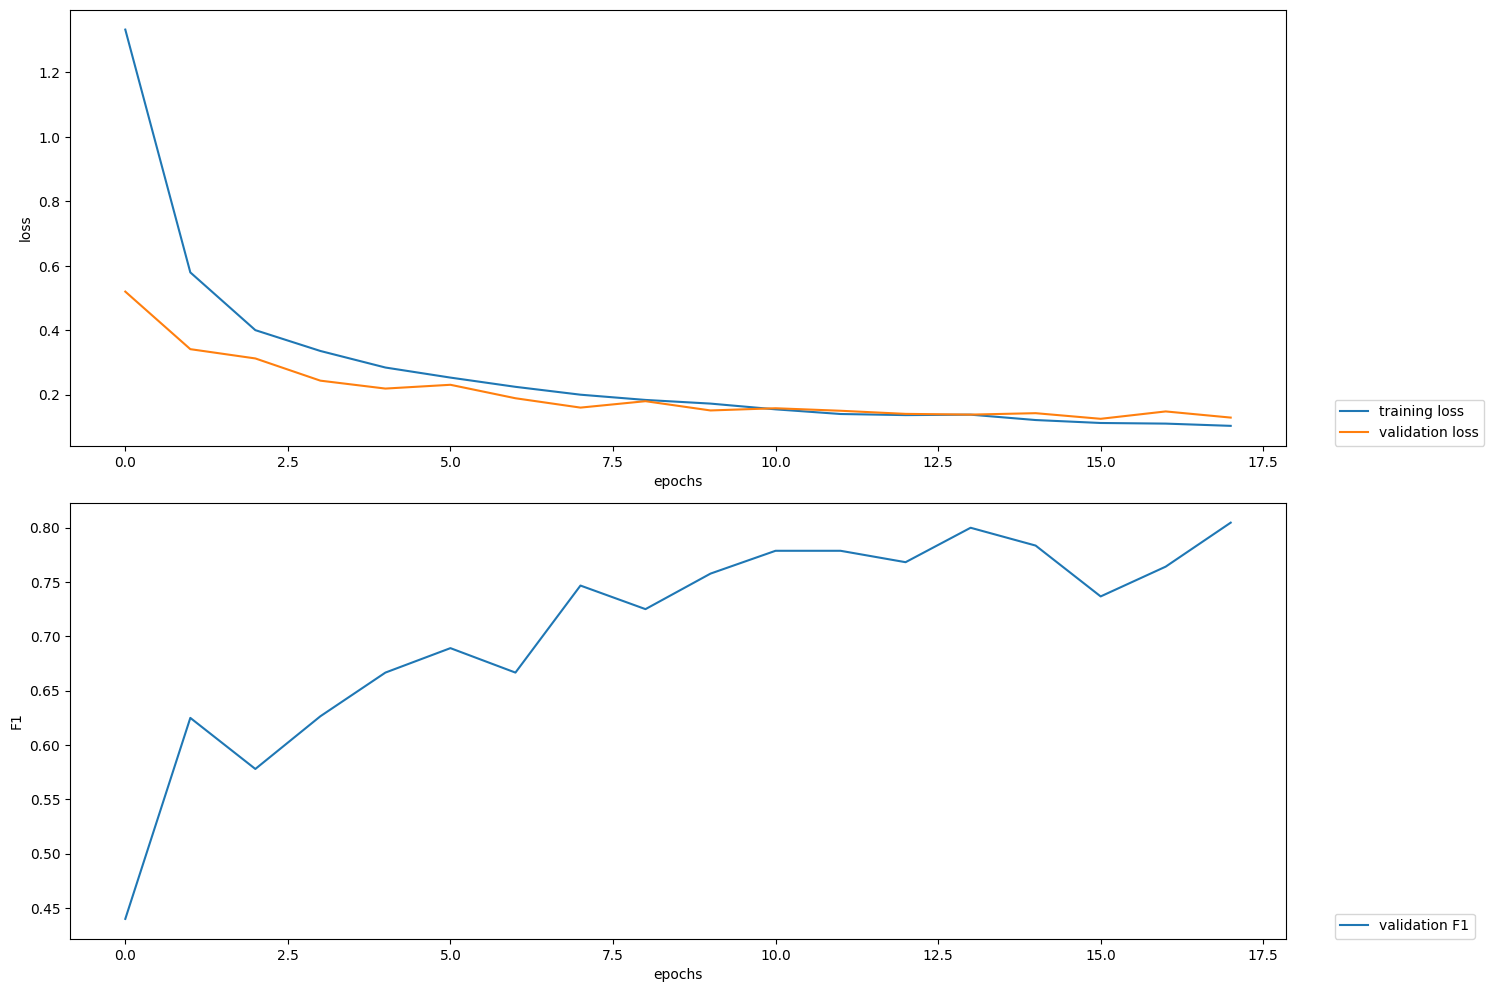

2024-01-23 16:20:08,225 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-rev/weights.png


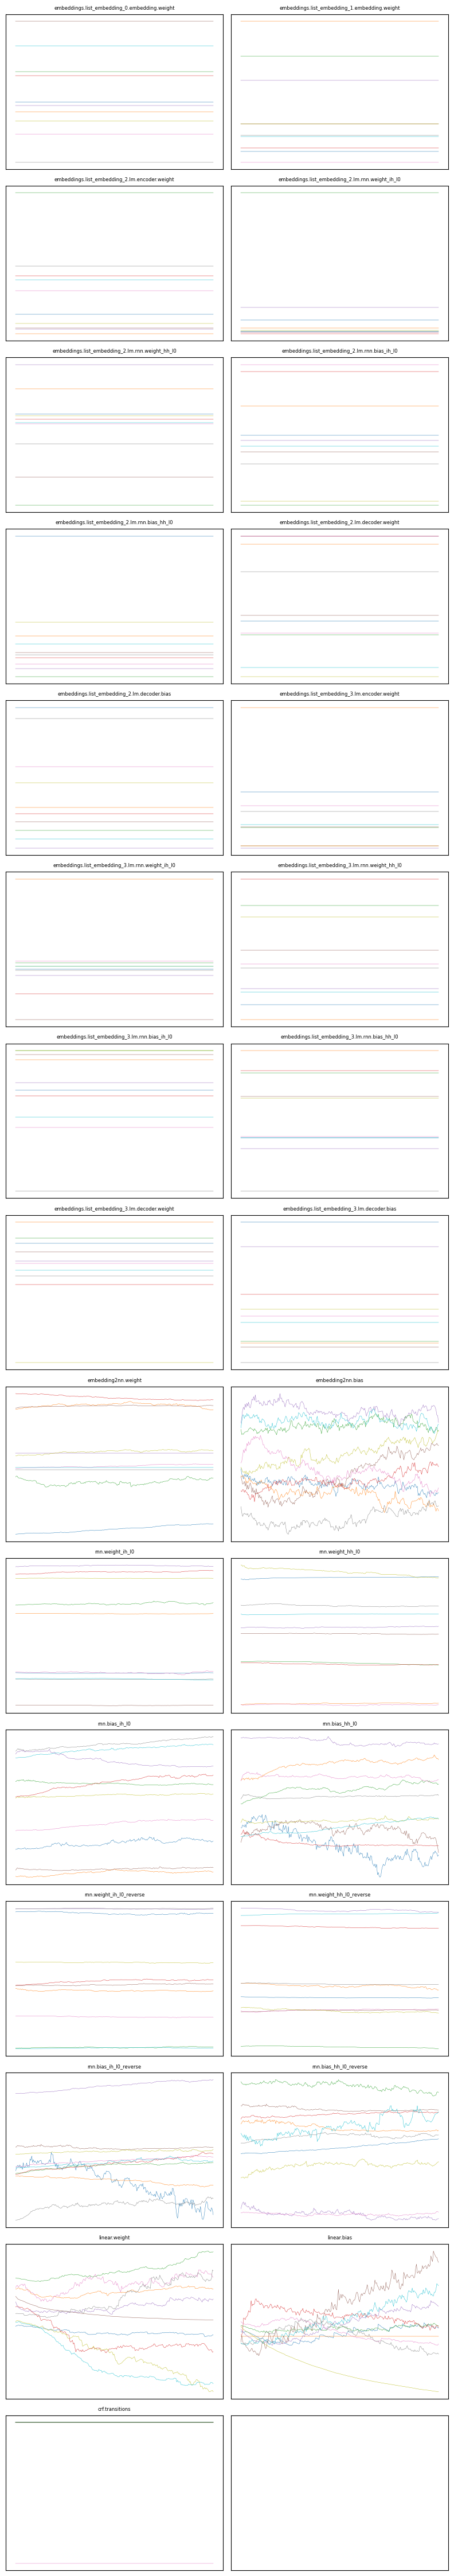

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')